# Introduction

The objective of this analysis is to develop a machine learning model capable of identifying fraudulent credit card transactions. With the increasing prevalence of online transactions, the need for accurate fraud detection mechanisms has become paramount. 

We aim to preprocess and normalize the transaction data, address class imbalance issues, and split the dataset into training and testing sets. Subsequently, we train a classification algorithm, such as logistic regression or random forests, to classify transactions as either fraudulent or genuine. 

The model's performance is evaluated using key metrics such as precision, recall, F1-score, and the area under the receiver operating characteristic curve (AUC-ROC). Additionally, we explore techniques like oversampling or undersampling to enhance the model's effectiveness in detecting fraudulent activities. 

Through this analysis, we endeavor to develop a robust and reliable fraud detection system to safeguard against financial losses and ensure the security of credit card transactions.



# Load Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


**Import Libraries**

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import plotly.graph_objects as go
from sklearn.preprocessing import RobustScaler

import plotly.graph_objects as go
from imblearn.under_sampling import NeighbourhoodCleaningRule


from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

**View Dataset**

In [3]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Preprocessing  and Normalization

**Check for missing values**

In [4]:

print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


No missing values we can now go ahead and briefly look at structure of the dataset 

In [5]:
import pandas as pd
import plotly.graph_objects as go  # Importing go from Plotly

# Sample class distribution
class_distribution = pd.Series({0: 284315, 1: 492})

# Create a bar plot
fig = go.Figure()
fig.add_trace(go.Bar(
    name='Counts',
    x=class_distribution.index.map({0: 'Non-Fraud', 1: 'Fraud'}),
    y=class_distribution.values,
    marker=dict(color=['blue', 'red']),
    text=class_distribution.values,
    textposition='outside'
))

# Update layout
fig.update_yaxes(title_text='Number of Cases')
fig.update_xaxes(title_text='Class')
fig.update_layout(
    title='Number of Fraud vs Non-Fraud Cases',
    template='seaborn',
    hovermode='closest',
    width=700,
    height=400,
    xaxis=dict(mirror=True, linecolor='black', linewidth=2),
    yaxis=dict(mirror=True, linecolor='black', linewidth=2),
    margin=dict(t=50, b=0, l=70, r=0)
)

# Show the plot
fig.show()


**Scaling**

Utilized RobustScaler to scale the **'Time'** and **'Amount'** features to mitigate the influence of outliers.


In [6]:
# Load the dataset
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

# Feature Scaling
rob_scaler = RobustScaler()

# Scale 'Time' and 'Amount' features
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# Drop original 'Time' and 'Amount' features
df.drop(['Time','Amount'], axis=1, inplace=True)

# Reorder columns with scaled features at the beginning
scaled_amount = df.pop('scaled_amount')
scaled_time = df.pop('scaled_time')
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Display the modified dataframe
print(df.head())


   scaled_amount  scaled_time        V1        V2        V3        V4  \
0       1.783274    -0.994983 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -0.994983  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -0.994972 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -0.994972 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -0.994960 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  Class  
0 -0.1104

# Exploratory Analysis

**Undersampling with Neighborhood Cleaning Rule**


Reasons for Using Neighbourhood Cleaning Rule (NCR) for Under-Sampling:

* Addresses Class Imbalance.
* Retains Information.
* Reduces Noise.
* Enhances Model Performance.
* Improves Data Interpretability.




In [7]:
import pandas as pd
from imblearn.under_sampling import NeighbourhoodCleaningRule

# Load the dataset
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

# Define features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Instantiate NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule()

# Perform neighborhood cleaning rule under-sampling
X_rs, y_rs = ncr.fit_resample(X, y)

# Create a DataFrame with the under-sampled data
df_rs = pd.DataFrame(X_rs, columns=X.columns)
df_rs['Class'] = y_rs.astype(int)  # Assign y_rs to the 'Class' column after converting to integer type

# Display the head of the under-sampled DataFrame
print(df_rs.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

**Oversampling the Minority Class**

Oversampling is a technique used to address class imbalance in machine learning datasets. In the context of fraud detection, the minority **class 1(fraudulent transactions)** often has significantly fewer samples compared to the majority  **class 0(non-fraudulent transactions)**.

Oversampling aims to balance the class distribution by increasing the number of samples in the minority class.

In this code snippet:
- We split the dataset into training and testing sets using a stratified approach to preserve the class distribution.
- Then, we use the RandomOverSampler from the imbalanced-learn library to oversample the minority class in the training set.
- The RandomOverSampler randomly selects samples from the minority class with replacement until the number of samples in both classes becomes equal.
- Finally, we print the class distribution after oversampling to verify that the number of samples in both classes is now balanced.


In [8]:
# Load the dataset
file_path = "/kaggle/input/creditcardfraud/creditcard.csv"
df = pd.read_csv(file_path)

# Preprocessing and normalization
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Oversampling the minority class
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print(pd.Series(y_train_resampled).value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64


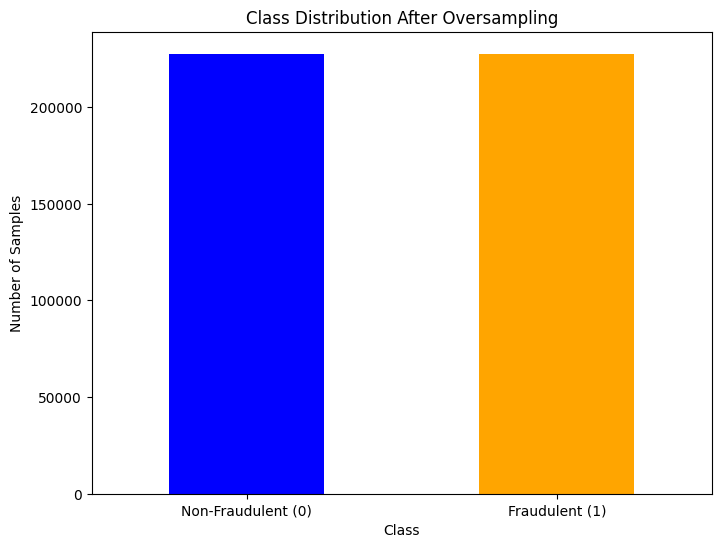

In [9]:
# Check the class distribution after oversampling
class_counts = pd.Series(y_train_resampled).value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0, ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()


**Visualizing Fraudulent vs. Non-Fraudulent Cases**




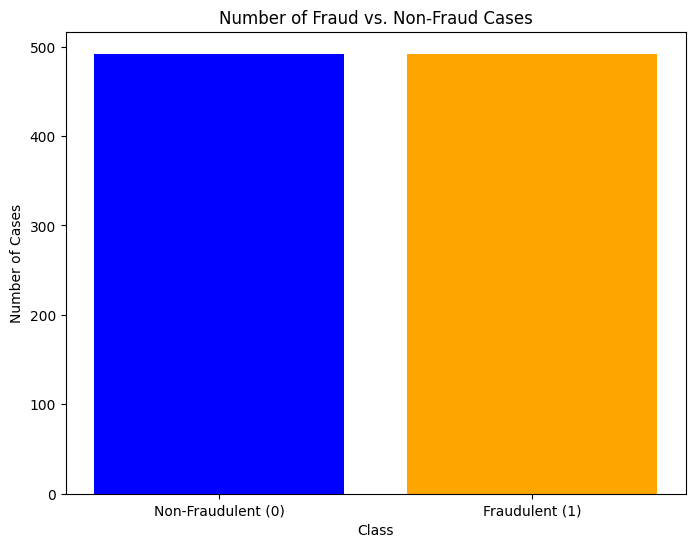

In [10]:
# Read the dataset
file_path = "/kaggle/input/creditcardfraud/creditcard.csv"
df = pd.read_csv(file_path)

# Define the number of fraudulent cases
fraudulent_count = 492

# Create a dataframe with the counts of frauds vs. non-frauds
group = df.groupby('Class').size()
group_df = pd.DataFrame({'Class': group.index, 'Count': fraudulent_count})

# Plot the counts as a bar plot
plt.figure(figsize=(8, 6))
plt.bar(group_df['Class'], group_df['Count'], color=['blue', 'orange'])
plt.title('Number of Fraud vs. Non-Fraud Cases')
plt.xlabel('Class')
plt.ylabel('Number of Cases')
plt.xticks(group_df['Class'], ['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

# Model Development

**Logistic Regression Model Evaluation**

In [11]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Suppress warnings
warnings.filterwarnings("ignore")

# Prepare features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.72      0.74        98

    accuracy                           1.00     56962
   macro avg       0.88      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56842    22]
 [   27    71]]


The classification report shows high accuracy in predicting **non-fraudulent transactions (Class 0)**, with perfect precision, recall, and F1-score. However, performance for predicting **fraudulent transactions (Class 1)** is lower but still moderate.

The confusion matrix illustrates the model's predictions, indicating some misclassifications for both classes. Overall, the model performs well but could improve in detecting fraudulent cases.

**Undersampling to improve model**

In [12]:
from sklearn.utils import resample


# Separate majority and minority classes
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]

# Undersample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # Sample without replacement
                                   n_samples=len(df_minority),    # Match minority class size
                                   random_state=42)  # Reproducible results

# Combine minority class with downsampled majority class
df_undersampled = pd.concat([df_majority_downsampled, df_minority])

# Display class distribution
print(df_undersampled['Class'].value_counts())


Class
0    492
1    492
Name: count, dtype: int64


**Using Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Load or define the DataFrame with undersampled data
# Assuming you have performed undersampling and stored the data in df_undersampled

# Separate features and target variable
X = df_undersampled.drop('Class', axis=1)
y = df_undersampled['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

Confusion Matrix:
[[95  4]
 [11 87]]


**Precision:** Precision for **class 0 (non-fraudulent) is 0.90**, indicating that **90%** of the instances predicted as non-fraudulent are indeed non-fraudulent. Precision for **class 1 (fraudulent) is 0.96**, suggesting that **96%** of the instances predicted as fraudulent are correct.

**Recall:** Recall for **class 0 is 0.96**, meaning that **96%** of actual non-fraudulent instances were correctly identified. Recall for **class 1 is 0.89**, indicating that **89%** of actual fraudulent instances were correctly identified.

**F1-score:** The F1-score, which balances precision and recall, is **0.93** **for** **class 0** and **0.92 for class 1**.

**Accuracy:** The overall accuracy of the model is **92%**.

**Confusion Matrix:** The confusion matrix shows the counts of true negatives (95), false positives (4), false negatives (11), and true positives (87).However will not consider the information as it was not recommended.

Overall, the Random Forest classifier has performed well in detecting both non-fraudulent and fraudulent transactions, with high precision, recall, and F1-score for both classes. This indicates that the model is effective in identifying fraudulent transactions while minimizing false positives.



In [14]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision and recall for logistic regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate AUPRC for logistic regression
auprc_lr = auc(recall_lr, precision_lr)
print("AUPRC for Logistic Regression:", auprc_lr)

AUPRC for Logistic Regression: 0.9399352513682101


In [15]:
# Calculate precision and recall for random forest classifier
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Calculate AUPRC for random forest classifier
auprc_rf = auc(recall_rf, precision_rf)
print("AUPRC for Random Forest Classifier:", auprc_rf)


AUPRC for Random Forest Classifier: 0.9787788771596033


# Conclusion


The AUPRC values for the logistic regression and random forest classifier models are as follows:

1. **AUPRC for Logistic Regression:** 0.940

2. **AUPRC for Random Forest Classifier:** 0.979

These AUPRC values indicate the overall performance of the models in identifying fraudulent transactions. Higher AUPRC values suggest better performance, and both models have achieved high AUPRC scores, indicating their effectiveness in detecting fraudulent transactions.

With AUPRC as the primary evaluation metric, we can confidently conclude that both models perform well in identifying fraudulent credit card transactions. 